<a href="https://colab.research.google.com/github/jrcendagorta/Convolution_NN/blob/master/Convolution_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0'

In [6]:
def prepare_images(X_train, y_train, X_test, y_test):
  X_train = X_train / 255.0
  X_test = X_test / 255.0

  # Image augmentation
  return (X_train, y_train),(X_test, y_test)


def model_gen():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=[32, 32, 3]))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,  padding='valid'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.6))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["sparse_categorical_accuracy"])
  return model

def summary_graphs(history):
  plt.plot(history.history['sparse_categorical_accuracy'])
  plt.plot(history.history['val_sparse_categorical_accuracy'])
  plt.title("Sparse Categorical Accuracy")
#	pyt.savefig('accuracy_plot.png')
#	pyt.close()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)       

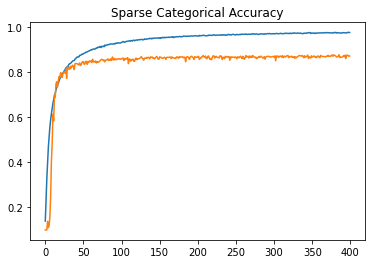

In [8]:
# Load and preprocess data

#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

(X_train, y_train), (X_test, y_test) = prepare_images(X_train, y_train, X_test, y_test)
model = model_gen()
model.summary()
history = model.fit(X_train, y_train, epochs=400,validation_data=(X_test, y_test),batch_size=1000)
summary_graphs(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8711 - sparse_categorical_accuracy: 0.7905


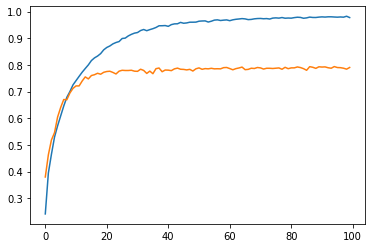